In [47]:
# handling data
import numpy as np
import pandas as pd

# plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats
from sklearn.linear_model import LinearRegression
from pygam import LinearGAM, s, l

# handling telomere length data
import fukushima_telomere_methods as f_tm

# for loading telo data column containing individual
# telomere length values, enables literal reading of a list as numbers
from ast import literal_eval

# incase module requires reloading
import importlib
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
&nbsp; 

...

&nbsp; 

---

In [48]:
# setting all graphs to have darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

# Mean Telomere Length and Dose
---

In [49]:
# Loading New Dose Quantifications (+age/sex data), Cortisol, Telomere FISH, and Dicentric Data

In [50]:
kelly_boar_dose = pd.read_csv('../excel data/cleaned/kelly_boar_dose.csv')
kelly_boar_teloFISH_df = pd.read_csv('../excel data/cleaned/kelly_boar_teloFISH_df.csv')

## Merging Kelly's Telomere FISH data w/ New Dose Quantifications (+age/sex data)

In [51]:
# general cols of interest
general_cols_of_interest = ['Sample ID', 'Sex', 'Age (months)', 
                            'INTERNAL Life time dose, mGy 134+137',
                            'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
                            'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
                            'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)'
                           ]

In [52]:
merge_kelly_teloFISH_dose = kelly_boar_teloFISH_df.merge(kelly_boar_dose, on=['Sample ID'])

# making new df for handling feature engineering of individual telo measurements, i.e counts of short/long telos 
place_hold_merge_kelly_teloFISH_dose_telo_counts = merge_kelly_teloFISH_dose.copy()

teloFISH_cols = general_cols_of_interest + ['teloFISH means']

# selecting cols of interest 
merge_kelly_teloFISH_dose = merge_kelly_teloFISH_dose[teloFISH_cols].copy()

In [53]:
merge_kelly_teloFISH_dose.rename(columns={'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)': 
                                          'Dose rate (uGy per h)'}, inplace=True)

f_tm.enforce_col_types(merge_kelly_teloFISH_dose)

In [54]:
# saving for final writeup
merge_kelly_teloFISH_dose.to_csv('../excel data/cleaned/merge_kelly_teloFISH_dose.csv', index=False)

## Visualizing Mean Telomere Length vs. Dose

In [55]:
dose_types = ['INTERNAL Life time dose, mGy 134+137',
              'EXTERNAL Dose Reasonable Life Time, mGy (134+137)',
              'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)',
              'Dose rate (uGy per h)']


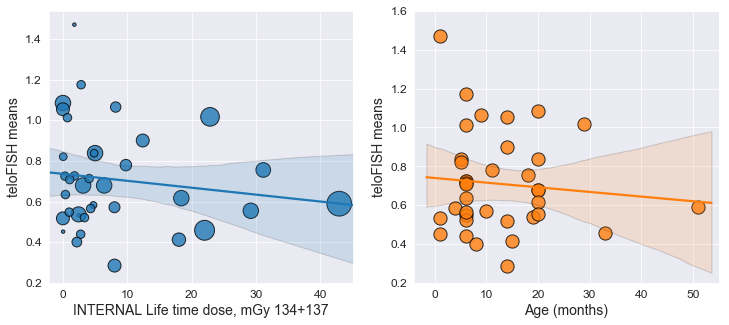

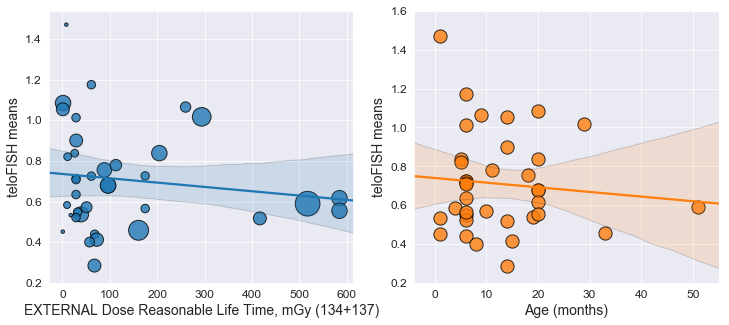

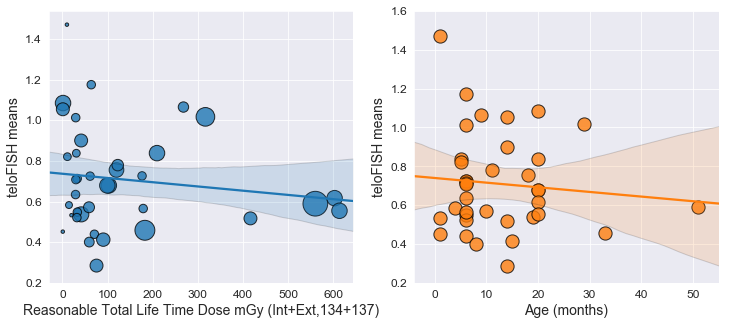

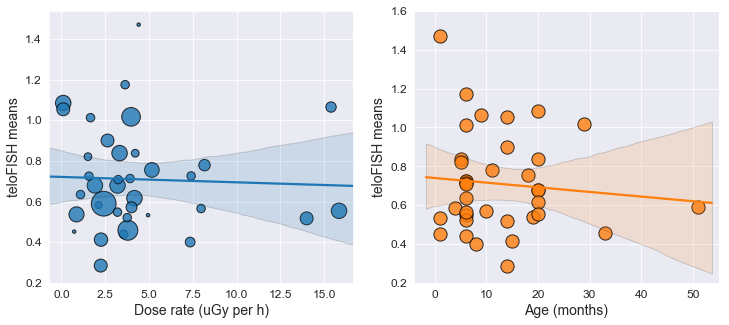

In [56]:
x2 = 'Age (months)'
y = 'teloFISH means'

for col in dose_types:
    f_tm.graph_dose_age_vs_telos(df=merge_kelly_teloFISH_dose, x=col, x2=x2, y=y)

## Statistics

In [57]:
merge_kelly_teloFISH_dose['encoded sex'] = merge_kelly_teloFISH_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [58]:
y = merge_kelly_teloFISH_dose['teloFISH means'].values.reshape(-1, 1)
y_name = 'teloFish means'

f_tm.linear_regression_scores_X_y(merge_kelly_teloFISH_dose, y, y_name, dose_types)

OLS | ['INTERNAL Life time dose, mGy 134+137'] vs. teloFish means --> R2: 0.0190
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)'] vs. teloFish means --> R2: 0.0193
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)', 'encoded sex'] vs. teloFish means --> R2: 0.0413

OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)'] vs. teloFish means --> R2: 0.0183
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)'] vs. teloFish means --> R2: 0.0187
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)', 'encoded sex'] vs. teloFish means --> R2: 0.0421

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. teloFish means --> R2: 0.0191
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. teloFish means --> R2: 0.0193
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. teloFish means --> R2: 0.0436

OLS | ['Dose rate (uGy per h)'] vs. t

In [59]:
X = merge_kelly_teloFISH_dose[['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)']]
y = merge_kelly_teloFISH_dose['teloFISH means']

teloFISH_gam = LinearGAM(s(0) + s(1), fit_intercept=True).fit(X, y)

In [60]:
teloFISH_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.3238
Link Function:                     IdentityLink Log Likelihood:                                  -135.9243
Number of Samples:                           37 AIC:                                              296.4963
                                                AICc:                                             310.3668
                                                GCV:                                                0.1335
                                                Scale:                                              0.0628
                                                Pseudo R-Squared:                                   0.2952
Feature Function                  Lam

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


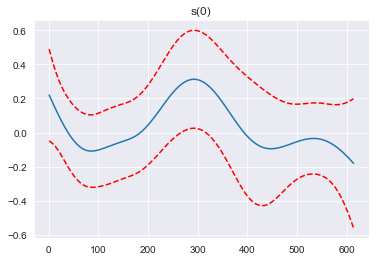

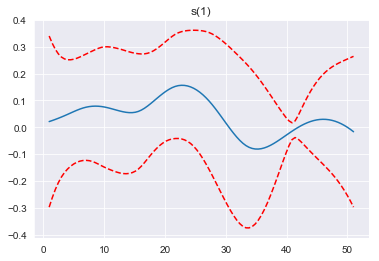

In [42]:
f_tm.plot_gam_partial_dependencies(teloFISH_gam)

# Cortisol and Dose
---

In [61]:
prep_boar_cortisol_df = pd.read_csv('../excel data/cleaned/prep_boar_cortisol_df.csv')
aryn_boar_dose = pd.read_csv('../excel data/cleaned/aryn_boar_dose.csv')

# renaming for consistency between cols
aryn_boar_dose.rename(columns={'Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)':
                               'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)'}, inplace=True)

In [16]:
# combining data
dose_cort_cols_interest = general_cols_of_interest + ['Cortisol (pg/mg)']

trim_kelly_dose_cortisol = f_tm.merge_return_df_cols_interest(kelly_boar_dose, prep_boar_cortisol_df, dose_cort_cols_interest)
trim_aryn_dose_cortisol = f_tm.merge_return_df_cols_interest(aryn_boar_dose, prep_boar_cortisol_df, dose_cort_cols_interest)
total_dose_cortisol = pd.concat([trim_kelly_dose_cortisol, trim_aryn_dose_cortisol], axis=0).reset_index(drop=True)

In [17]:
# renaming col & enforcing col types
total_dose_cortisol.rename(columns={'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)': 
                                    'Dose rate (uGy per h)'}, inplace=True)

f_tm.enforce_col_types(total_dose_cortisol)

In [18]:
# saving for final writeup
total_dose_cortisol.to_csv('../excel data/cleaned/total_dose_cortisol.csv', index=False)

## Visualizing Cortisol vs. Dose

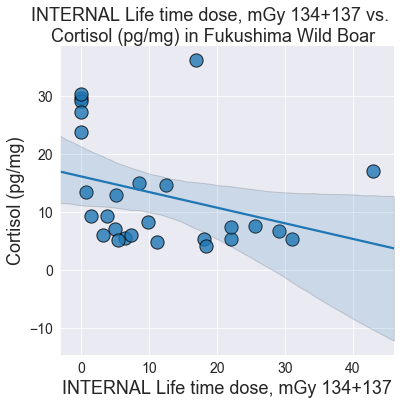

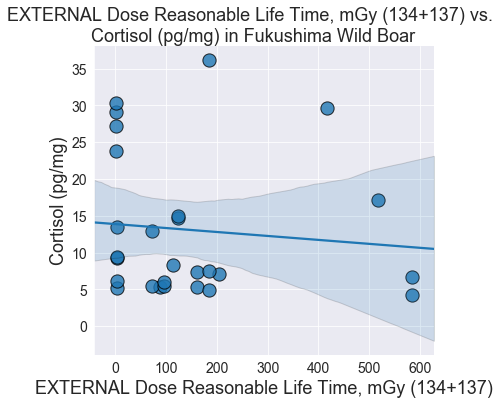

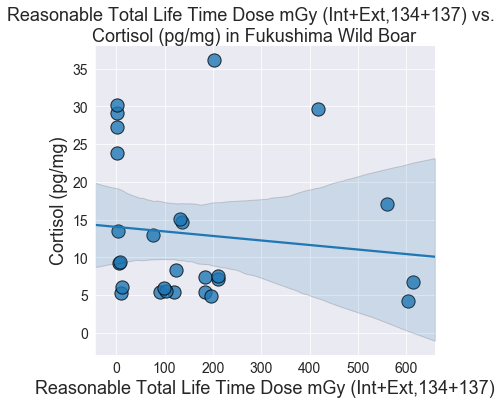

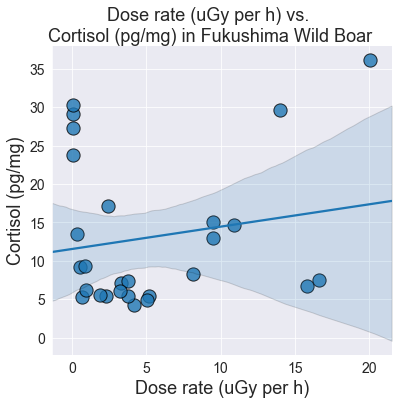

In [19]:
for col in dose_types:
    f_tm.linear_regression_graphs_between_variables(x=col, y='Cortisol (pg/mg)', data=total_dose_cortisol)

## Statistics

In [20]:
total_dose_cortisol['encoded sex'] = total_dose_cortisol['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [21]:
y = total_dose_cortisol['Cortisol (pg/mg)'].values.reshape(-1, 1)
y_name = 'Cortisol (pg/mg)'

f_tm.linear_regression_scores_X_y(total_dose_cortisol, y, y_name, dose_types)

OLS | ['INTERNAL Life time dose, mGy 134+137'] vs. Cortisol (pg/mg) --> R2: 0.1013
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)'] vs. Cortisol (pg/mg) --> R2: 0.1587
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)', 'encoded sex'] vs. Cortisol (pg/mg) --> R2: 0.1636

OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)'] vs. Cortisol (pg/mg) --> R2: 0.0096
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)'] vs. Cortisol (pg/mg) --> R2: 0.0098
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)', 'encoded sex'] vs. Cortisol (pg/mg) --> R2: 0.0104

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Cortisol (pg/mg) --> R2: 0.0130
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. Cortisol (pg/mg) --> R2: 0.0136
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. Cortisol (pg/mg) --> R2: 0.0146

OLS | ['Dose rate (

# Aryn Data (telomere length qPCR)

## Boar qPCR data

In [45]:
aryn_boar_df = pd.read_csv('../excel data/cleaned/aryn_boar_df.csv')
aryn_boar_df.drop(['Sex'], axis=1, inplace=True)

In [62]:
qPCR_cols_interest = general_cols_of_interest + ['Normalized T/A Average (Average Telomere Length)']

#aryn_boar_dose is loaded above in the cortisol section
aryn_qPCR_dose = f_tm.merge_return_df_cols_interest(aryn_boar_dose, aryn_boar_df, qPCR_cols_interest)
aryn_qPCR_dose.replace(to_replace=' ', value=np.NaN, inplace=True)
aryn_qPCR_dose.dropna(axis=0, inplace=True)
aryn_qPCR_dose.rename(columns={'Normalized T/A Average (Average Telomere Length)': 
                               'Mean Telomere Length (qPCR)',
                               'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)': 
                               'Dose rate (uGy per h)'}, inplace=True)

f_tm.enforce_col_types(aryn_qPCR_dose)

In [24]:
# saving for final writeup
aryn_qPCR_dose.to_csv('../excel data/cleaned/aryn_boar_qPCR_dose.csv', index=False)

### Visualizing Mean Telomere Length vs. Dose

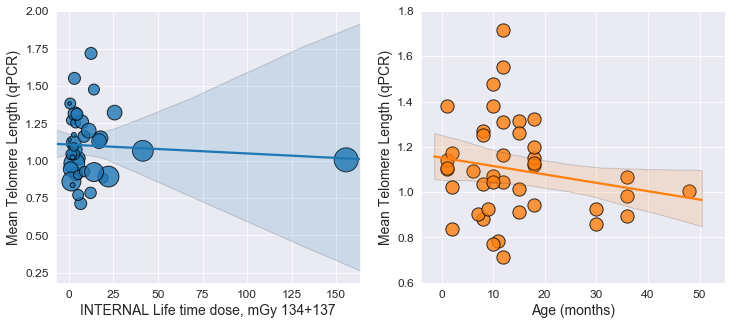

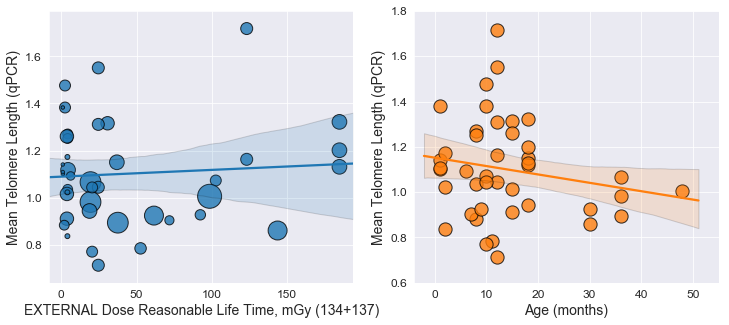

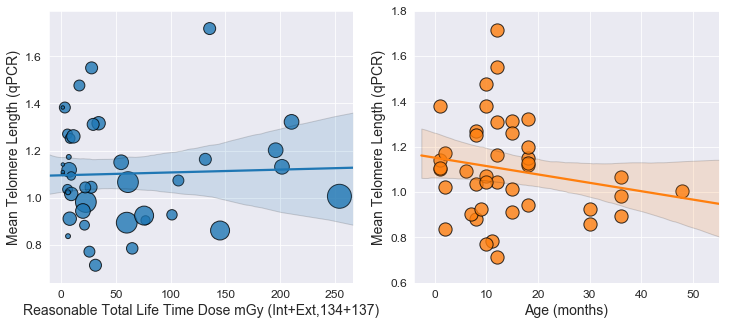

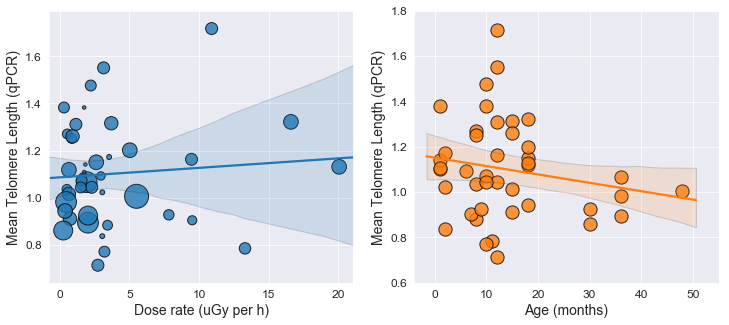

In [42]:
x2 = 'Age (months)'
y = 'Mean Telomere Length (qPCR)'

for col in dose_types:
    f_tm.graph_dose_age_vs_telos(df=aryn_qPCR_dose, x=col, x2=x2, y=y)

### Statistics

In [26]:
aryn_qPCR_dose['encoded sex'] = aryn_qPCR_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [44]:
y = aryn_qPCR_dose['Mean Telomere Length (qPCR)'].values.reshape(-1, 1)
y_name = 'Mean Telos (qPCR)'

f_tm.linear_regression_scores_X_y(aryn_qPCR_dose, y, y_name, dose_types)

OLS | ['INTERNAL Life time dose, mGy 134+137'] vs. Mean Telos (qPCR) --> R2: 0.0045
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)'] vs. Mean Telos (qPCR) --> R2: 0.0380
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)', 'encoded sex'] vs. Mean Telos (qPCR) --> R2: 0.0443

OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)'] vs. Mean Telos (qPCR) --> R2: 0.0054
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)'] vs. Mean Telos (qPCR) --> R2: 0.0549
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)', 'encoded sex'] vs. Mean Telos (qPCR) --> R2: 0.0594

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Mean Telos (qPCR) --> R2: 0.0014
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. Mean Telos (qPCR) --> R2: 0.0579
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. Mean Telos (qPCR) --> R2: 0.0632

OLS | ['Do

In [63]:
X = aryn_qPCR_dose[['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)']]
y = aryn_qPCR_dose['Mean Telomere Length (qPCR)']

telo_qPCR_gam = LinearGAM(s(0) + s(1), fit_intercept=True).fit(X, y)

In [64]:
telo_qPCR_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.9614
Link Function:                     IdentityLink Log Likelihood:                                  -231.2395
Number of Samples:                           42 AIC:                                              488.4019
                                                AICc:                                             501.3097
                                                GCV:                                                0.0925
                                                Scale:                                              0.0467
                                                Pseudo R-Squared:                                   0.2656
Feature Function                  Lam

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


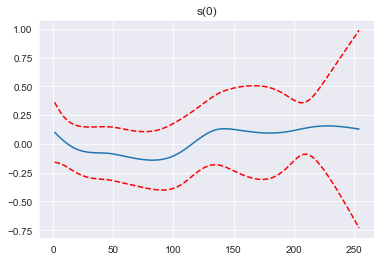

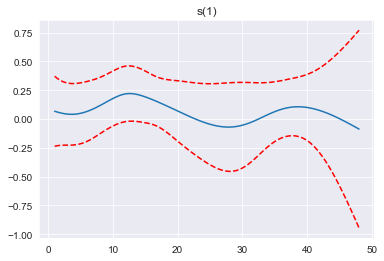

In [65]:
f_tm.plot_gam_partial_dependencies(telo_qPCR_gam)

## Snake qPCR data

In [50]:
aryn_snake_df = pd.read_csv('../excel data/cleaned/aryn_snake_df.csv')

aryn_snake_df['Sex'] = aryn_snake_df['Sex'].apply(lambda row: f_tm.male_or_female(row))
aryn_snake_df['encode sex'] = aryn_snake_df['Sex'].apply(lambda row: f_tm.encode_sex(row))
aryn_snake_df.rename(columns={'Telomere Length (qPCR)': 'Mean Telomere Length (qPCR)'}, inplace=True)

error... row == -
ERROR.. row == nan


In [51]:
# saving for later writeup
aryn_snake_df.to_csv('../excel data/cleaned/aryn_snake_df.csv', index=False)

### Visualizing Mean Telomere Length vs. Dose rate

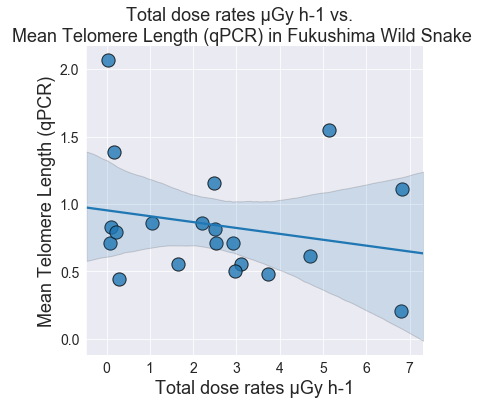

In [52]:
f_tm.linear_regression_graphs_between_variables(x='Total dose rates μGy h-1', y='Mean Telomere Length (qPCR)',
                                                data=aryn_snake_df, snake=True)

In [53]:
features_list = [['Total dose rates μGy h-1'], ['Total dose rates μGy h-1', 'encode sex']]

for features in features_list:
    if 'encode sex' in features:
        aryn_snake_df.dropna(axis=0, inplace=True)
    y = aryn_snake_df['Mean Telomere Length (qPCR)'].values.reshape(-1, 1)
    X = aryn_snake_df[features].values.reshape(-1, len(features))
    fit_lm = LinearRegression().fit(X, y)
    
    print(f'OLS | {features} vs. Mean Telomere Length (qPCR) --> R2: {fit_lm.score(X, y):.4f}')

OLS | ['Total dose rates μGy h-1'] vs. Mean Telomere Length (qPCR) --> R2: 0.0469
OLS | ['Total dose rates μGy h-1', 'encode sex'] vs. Mean Telomere Length (qPCR) --> R2: 0.0929


# Dicentrics and Dose

In [54]:
kelly_boar_dicentrics_df = pd.read_csv('../excel data/cleaned/kelly_boar_dicentrics_df.csv')

In [55]:
dicentrics_cols = general_cols_of_interest + ['Average Dicentrics per cell']
merge_dicentrics_dose = f_tm.merge_return_df_cols_interest(kelly_boar_dose, kelly_boar_dicentrics_df, dicentrics_cols)

merge_dicentrics_dose.rename(columns={'Dose rate (uGy/h, not lifetime) at time of capture (Int+Ext; 134+137)': 
                                      'Dose rate (uGy per h)'}, inplace=True)

In [56]:
# saving for later writeup
merge_dicentrics_dose.to_csv('../excel data/cleaned/merge_dicentrics_dose.csv', index=False)

## Visualizing Dicentrics vs. Dose

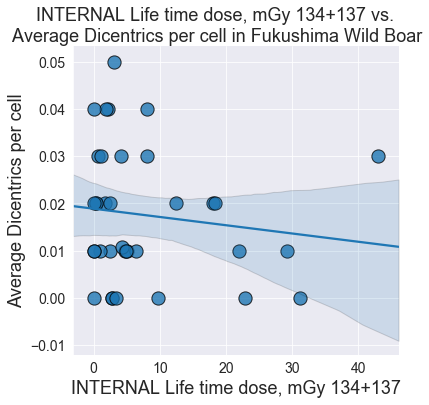

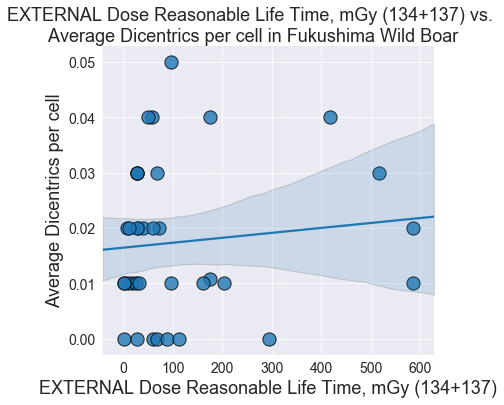

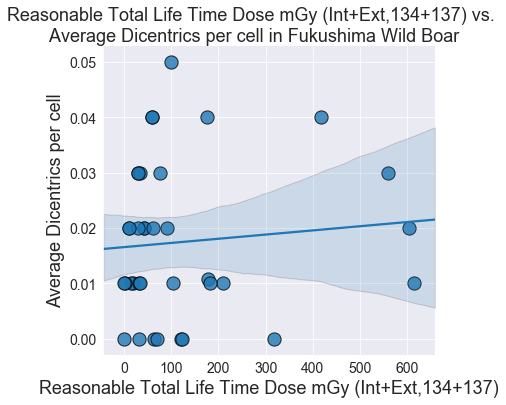

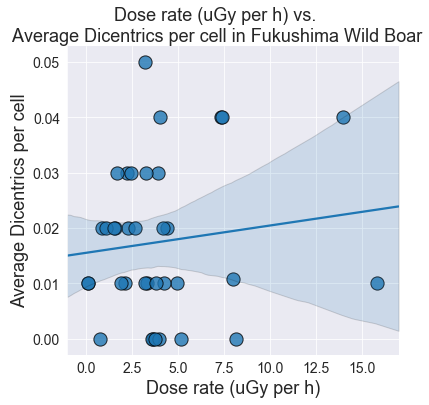

In [57]:
for col in dose_types:
    f_tm.linear_regression_graphs_between_variables(x=col, y='Average Dicentrics per cell', data=merge_dicentrics_dose)

## Statistics

In [58]:
merge_dicentrics_dose['encoded sex'] = merge_dicentrics_dose['Sex'].apply(lambda row: f_tm.encode_sex(row))

In [59]:
y = merge_dicentrics_dose['Average Dicentrics per cell'].values.reshape(-1, 1)
y_name = 'Avg Dicentrics/cell'

f_tm.linear_regression_scores_X_y(merge_dicentrics_dose, y, y_name, dose_types)

OLS | ['INTERNAL Life time dose, mGy 134+137'] vs. Avg Dicentrics/cell --> R2: 0.0173
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)'] vs. Avg Dicentrics/cell --> R2: 0.0801
OLS | ['INTERNAL Life time dose, mGy 134+137', 'Age (months)', 'encoded sex'] vs. Avg Dicentrics/cell --> R2: 0.0834

OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)'] vs. Avg Dicentrics/cell --> R2: 0.0109
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)'] vs. Avg Dicentrics/cell --> R2: 0.0110
OLS | ['EXTERNAL Dose Reasonable Life Time, mGy (134+137)', 'Age (months)', 'encoded sex'] vs. Avg Dicentrics/cell --> R2: 0.0458

OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'] vs. Avg Dicentrics/cell --> R2: 0.0085
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)'] vs. Avg Dicentrics/cell --> R2: 0.0085
OLS | ['Reasonable Total Life Time Dose mGy (Int+Ext,134+137)', 'Age (months)', 'encoded sex'] vs. Avg Dicentrics/cell --> R2: 

# Misc data representations

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 <a list of 8 Text yticklabel objects>)

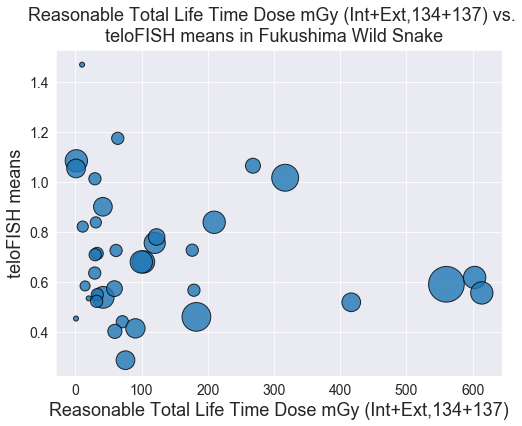

In [43]:
x = 'Reasonable Total Life Time Dose mGy (Int+Ext,134+137)'
y = 'teloFISH means'

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=x, y=y, s=merge_kelly_teloFISH_dose['Age (months)'] * 25, alpha=0.8, 
                     data=merge_kelly_teloFISH_dose, 
                     linewidth=1,
                     edgecolor='black',
                    )

plt.suptitle(f'{x} vs.\n {y} in Fukushima Wild Snake', fontsize=18)
# plt.subplots_adjust(top=.85)

plt.xlabel(x, fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel(y, fontsize=18)
plt.yticks(fontsize=14)